In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [6]:
df = pd.read_csv('Modified2.csv')
df.columns = ['row ID','Financial_Year','Branch_Code','Sequence_1','Sequence_2','Donation_type','Donor_Age','Donation_Date','Gender','Blood_Group_Code','Donor_Weight','Donor_Temperature','Donor_Pulse','Donor_Hemoglobin','Donor_Blood_Pressure','Test_1','C1','Test_2','C2','Test_3','Test_4','Result']
df = df.dropna()
df['Date'] = pd.to_datetime(df.Donation_Date, format='%d-%b-%y')
df.set_index('Date', inplace=True)
df.head(5)

,row ID,Financial_Year,Branch_Code,Sequence_1,Sequence_2,Donation_type,Donor_Age,Donation_Date,Gender,Blood_Group_Code,...,Donor_Pulse,Donor_Hemoglobin,Donor_Blood_Pressure,Test_1,C1,Test_2,C2,Test_3,Test_4,Result
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,1,14,BRC-01,345,1.0,R,24.0,1-Jul-13,M,5,...,72,13.0,120/80,0.121,N,0.224,N,R,N,1
2013-07-01,2,14,BRC-01,346,2.0,R,33.0,1-Jul-13,M,3,...,72,13.0,120/80,0.122,N,0.222,N,N,N,0
2013-07-01,3,14,BRC-01,347,3.0,R,28.0,1-Jul-13,M,5,...,72,13.0,120/80,0.123,N,0.221,N,N,N,0
2013-07-01,4,14,BRC-01,348,4.0,R,20.0,1-Jul-13,M,3,...,72,13.0,120/80,0.123,N,0.242,N,N,N,0
2013-07-01,5,14,BRC-01,349,5.0,T,22.0,1-Jul-13,M,7,...,72,13.0,120/80,0.124,N,0.243,N,N,N,0


In [29]:
monthly_summary = pd.DataFrame()
monthly_summary['Donor_Age'] = df['Donor_Age'].resample('M').mean()
monthly_summary['Donor_Weight'] = df['Donor_Weight'].resample('M').mean()
monthly_summary['Blood_Group_Code'] = df['Blood_Group_Code'].resample('M').mean()
monthly_summary['Donor_Temperature'] = df['Donor_Temperature'].resample('M').mean()
monthly_summary['Donor_Pulse'] = df['Donor_Pulse'].resample('M').mean()
monthly_summary['Donor_Hemoglobin'] = df['Donor_Hemoglobin'].resample('M').mean()
monthly_summary['Test_1'] = df['Test_1'].resample('M').mean()
monthly_summary['Test_2'] = df['Test_2'].resample('M').mean()
monthly_summary['Result'] = df['Result'].resample('M').count()

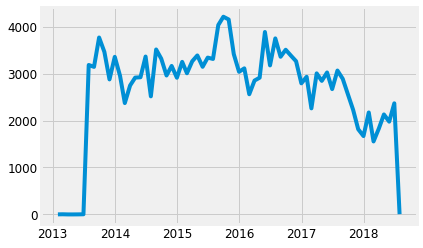

In [30]:
plt.plot(monthly_summary['Result'])

In [31]:
y = df['Result'].resample('MS').count()

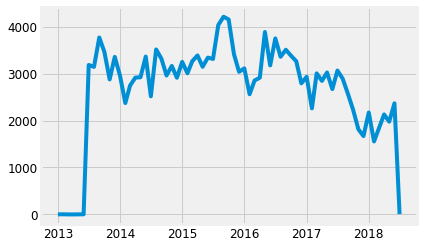

In [32]:
plt.plot(y)

In [ ]:
#Algorithm Arima

In [55]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [56]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Usman\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

In [57]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9682      0.179     -5.408      0.000      -1.319      -0.617
ma.L1          0.3203      0.382      0.838      0.402      -0.429       1.070
ar.S.L12      -0.2963      0.128     -2.312      0.021      -0.547      -0.045
sigma2      2.609e+05   3.93e+04      6.639      0.000    1.84e+05    3.38e+05


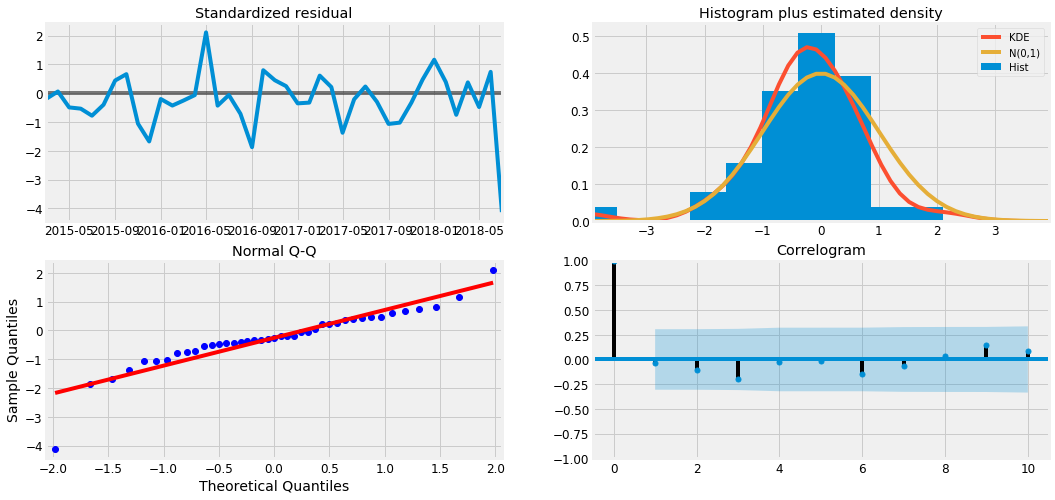

In [58]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

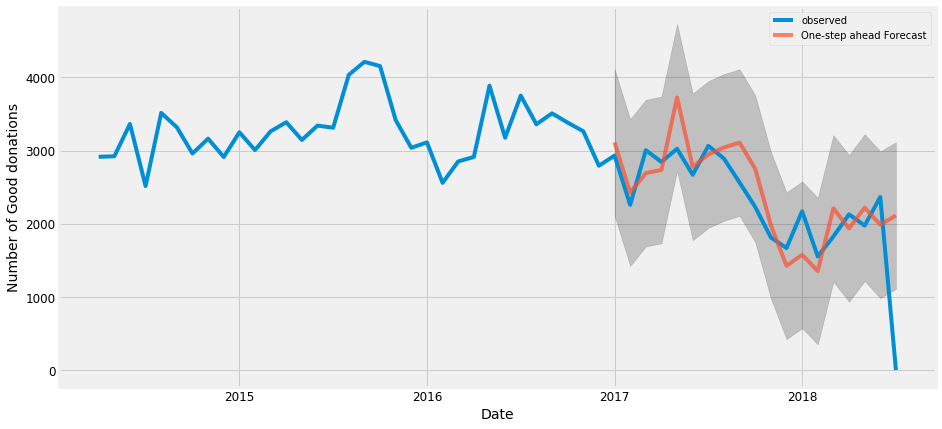

In [59]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_uc = results.get_forecast(steps=500)
pred_ci = pred.conf_int()
ax = y[df['Donation_Date'].min():].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Number of Good donations')
plt.legend()

In [60]:
pred_uc = results.get_forecast(steps=500)

In [61]:
pred_ci = pred_uc.conf_int()

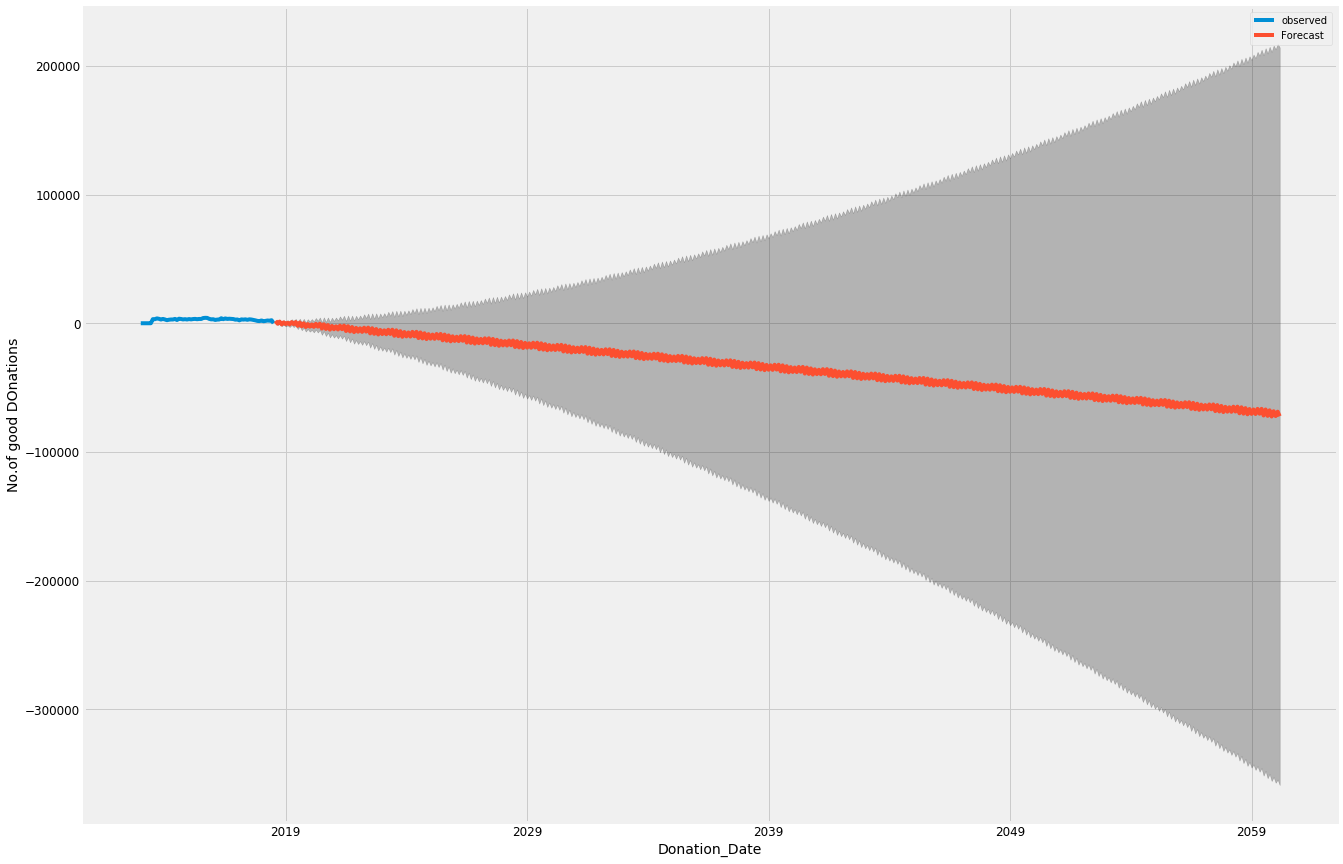

In [62]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Donation_Date')
ax.set_ylabel('No.of good DOnations')

plt.legend()
plt.show()

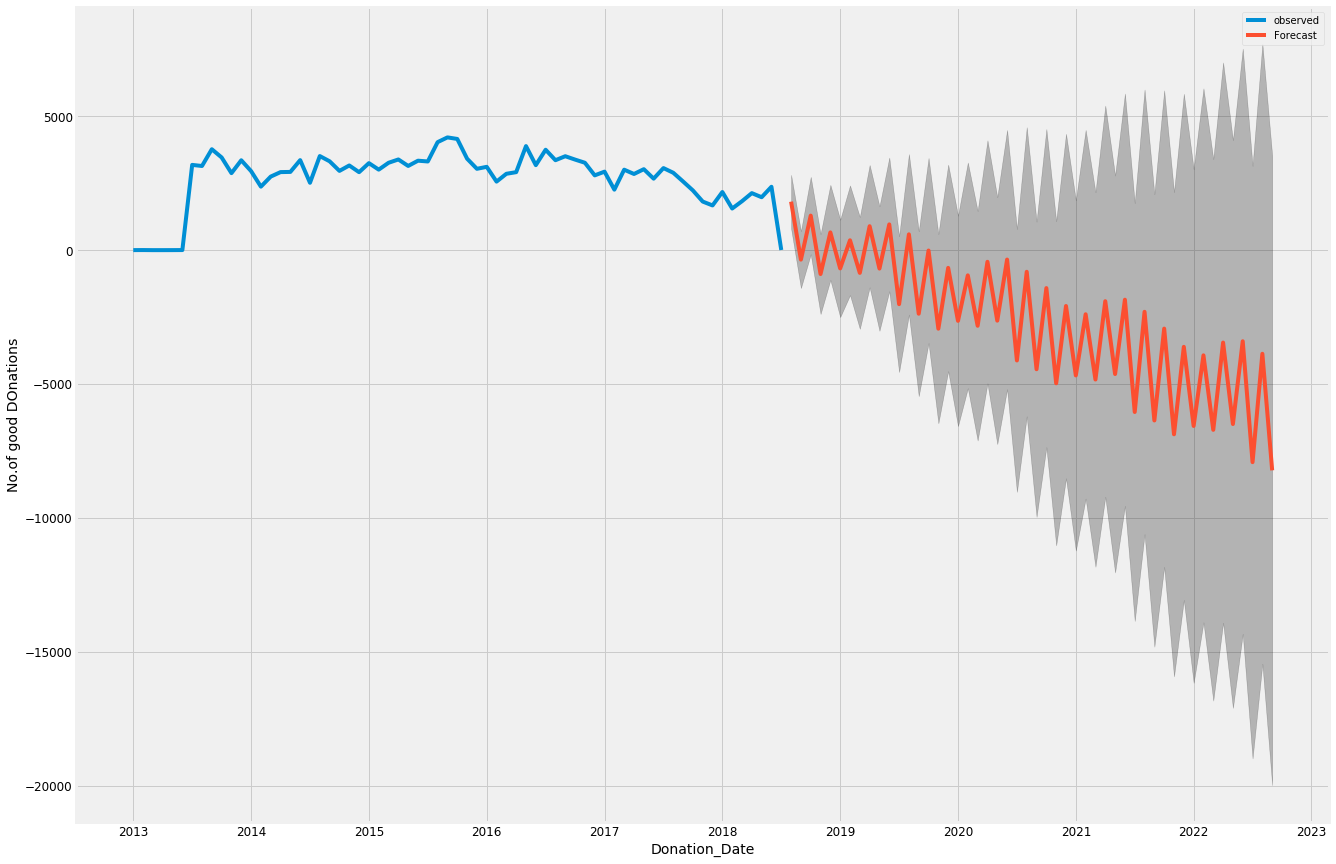

In [64]:
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Donation_Date')
ax.set_ylabel('No.of good DOnations')

plt.legend()
plt.show()